Import some useful libraries

In [1]:
import cv2 as cv
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
import keras
from keras import layers
import dlib
import pandas as pd

Images preprocessing

In [2]:
# !mkdir frames_1
# !mkdir frames_2
# !mkdir frames_3
# !mkdir frames_4
# !mkdir results_1
# !mkdir results_2
# !mkdir results_3
# !mkdir results_4
# os.listdir()

In [3]:
input_1 = 'C:/Users/touhama/Desktop/project items/autoencoder/raw videos/trump1.mp4'
input_2 = 'C:/Users/touhama/Desktop/project items/autoencoder/raw videos/trump2.mp4'
input_3 = 'C:/Users/touhama/Desktop/project items/autoencoder/raw videos/biden1.mp4'
input_4 = 'C:/Users/touhama/Desktop/project items/autoencoder/raw videos/biden2.mp4'
output_1 = 'C:/Users/touhama/Desktop/project items/autoencoder/frames_1/'
output_2 = 'C:/Users/touhama/Desktop/project items/autoencoder/frames_2/'
output_3 = 'C:/Users/touhama/Desktop/project items/autoencoder/frames_3/'
output_4 = 'C:/Users/touhama/Desktop/project items/autoencoder/frames_4/'

Extract frames from videos

In [4]:

def extract_frames(input_path,output_path):
    videocapture = cv.VideoCapture(input_path)
    success,image = videocapture.read()
    count = 0
    while success:
        cv.imwrite(output_path+"frame%d.jpg" % count, image)     
        success,image = videocapture.read()
        count += 1
    return count

In [5]:
# extract_frames(input_1, output_1)
# extract_frames(input_2, output_2)
# extract_frames(input_3, output_3)
# extract_frames(input_4, output_4)

In [6]:
total_frames_1 = len(os.listdir(output_1))
total_frames_2 = len(os.listdir(output_2))
total_frames_3 = len(os.listdir(output_3))
total_frames_4 = len(os.listdir(output_4))

In [7]:
print('Total frames extracted in video 1: ',total_frames_1)
print('Total frames extracted in video 2: ',total_frames_2)
print('Total frames extracted in video 3: ',total_frames_3)
print('Total frames extracted in video 4: ',total_frames_4)

Total frames extracted in video 1:  1701
Total frames extracted in video 2:  1875
Total frames extracted in video 3:  1109
Total frames extracted in video 4:  1530


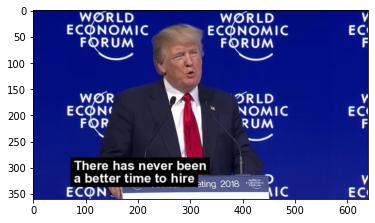

In [9]:
%matplotlib inline
plt.figure()
image = cv.imread(output_1+'frame1.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image = image.astype('float32')
image /= 255.0
plt.imshow(image)
plt.show()

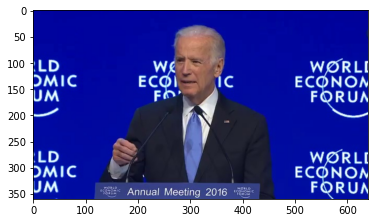

In [10]:

%matplotlib inline
plt.figure()
image = cv.imread(output_3+'frame1.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image = image.astype('float32')
image /= 255.0
plt.imshow(image)
plt.show()

Crop faces from frames

In [11]:
# pip install mtcnn

1/1 [==============================] - 0s 364ms/step


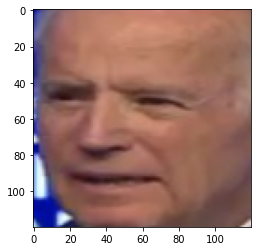

In [12]:
from mtcnn import MTCNN
 
detector = MTCNN()
image = cv.imread(output_3+'frame1.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
detections = detector.detect_faces(image)
x, y, width, height = detections[0]['box']
x1,y1,x2,y2 = x, y, x + width, y + height
face = image[y1:y2, x1:x2]
face = cv.resize(face, (120, 120), interpolation=cv.INTER_LINEAR)
plt.imshow(face)
plt.show()

1/1 [==============================] - 0s 356ms/step


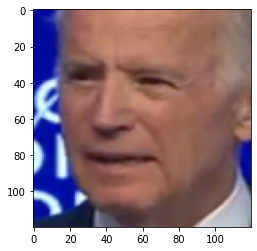

In [13]:
detector = MTCNN()
image = cv.imread(output_3+'frame1.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
detections = detector.detect_faces(image)
x, y, width, height = detections[0]['box']
x1,y1,x2,y2 = x-10, y+10, x+width+10, y+height+10
face = image[y1:y2, x1:x2]
face = cv.resize(face, (120, 120), interpolation=cv.INTER_LINEAR)
plt.imshow(face)
plt.show()

In [14]:
detections

[{'box': [270, 53, 73, 108],
  'confidence': 0.9999954700469971,
  'keypoints': {'left_eye': (280, 96),
   'right_eye': (311, 98),
   'nose': (290, 119),
   'mouth_left': (282, 135),
   'mouth_right': (311, 137)}}]

In [15]:
def extract_faces(source,destination,detector):
    counter = 0
    for dirname, _, filenames in os.walk(source):
        for filename in filenames:
            image = cv.imread(os.path.join(dirname, filename))
            image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
            detections = detector.detect_faces(image)
            x, y, width, height = detections[0]['box']
            x1,y1,x2,y2 = x-10, y+10, x+width+10, y+height+10
            face = image[y1:y2, x1:x2]
            face = cv.resize(face, (120, 120), interpolation=cv.INTER_LINEAR)
            plt.imsave(os.path.join(destination,filename+'.jpg'),face)
            print('Saved: ',os.path.join(destination,str(counter)+'.jpg'))
            counter += 1

In [6]:
# with tf.device('gpu:0'):
#     detector = MTCNN()
#     # extract_faces('C:/Users/touhama/Desktop/autoencoder/frames_1/', 'C:/Users/touhama/Desktop/autoencoder/results_1/',detector)
#     # extract_faces('C:/Users/touhama/Desktop/autoencoder/frames_2/', 'C:/Users/touhama/Desktop/autoencoder/results_2/',detector)
#     # extract_faces('C:/Users/touhama/Desktop/autoencoder/frames_3/', 'C:/Users/touhama/Desktop/autoencoder/results_3/',detector)
#     extract_faces('C:/Users/touhama/Desktop/autoencoder/frames_4/', 'C:/Users/touhama/Desktop/autoencoder/results_4/',detector)

1/1 [==============================] - 0s 360ms/step
Saved:  C:/Users/touhama/Desktop/autoencoder/results_4/0.jpg
1/1 [==============================] - 0s 56ms/step
Saved:  C:/Users/touhama/Desktop/autoencoder/results_4/1.jpg
1/1 [==============================] - 0s 88ms/step
Saved:  C:/Users/touhama/Desktop/autoencoder/results_4/2.jpg
1/1 [==============================] - 0s 62ms/step
Saved:  C:/Users/touhama/Desktop/autoencoder/results_4/3.jpg
1/1 [==============================] - 0s 61ms/step
Saved:  C:/Users/touhama/Desktop/autoencoder/results_4/4.jpg
1/1 [==============================] - 0s 64ms/step
Saved:  C:/Users/touhama/Desktop/autoencoder/results_4/5.jpg
1/1 [==============================] - 0s 56ms/step
Saved:  C:/Users/touhama/Desktop/autoencoder/results_4/6.jpg
1/1 [==============================] - 0s 120ms/step
Saved:  C:/Users/touhama/Desktop/autoencoder/results_4/7.jpg
1/1 [==============================] - 0s 92ms/step
Saved:  C:/Users/touhama/Desktop/autoencod

Prepare data for training

In [16]:
def create_dataset(path):
    images = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            image = cv.imread(os.path.join(dirname, filename))
            image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
            image = image.astype('float32')
            image /= 255.0
            images.append(image)
    return images

In [17]:
faces_1 = np.array(create_dataset('C:/Users/touhama/Desktop/project items/autoencoder/results_1') + create_dataset('C:/Users/touhama/Desktop/project items/autoencoder/results_2'))
faces_2 = np.array(create_dataset('C:/Users/touhama/Desktop/project items/autoencoder/results_3') + create_dataset('C:/Users/touhama/Desktop/project items/autoencoder/results_4'))

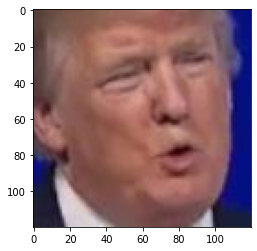

In [18]:
%matplotlib inline
plt.figure()
plt.imshow(faces_1[1])
plt.show()

In [19]:
print("Total President Trump face's samples: ",len(faces_1))
print("Total President Biden face's samples: ",len(faces_2))

Total President Trump face's samples:  3576
Total President Biden face's samples:  2639


In [20]:
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(faces_1, faces_1, test_size=0.20, random_state=0)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(faces_2, faces_2, test_size=0.15, random_state=0)

In [21]:
print(X_train_a.shape)
print(y_train_a.shape)
print('===================')
print(X_test_a.shape)
print(y_test_a.shape)


(2860, 120, 120, 3)
(2860, 120, 120, 3)
(716, 120, 120, 3)
(716, 120, 120, 3)


In [22]:
print(X_train_b.shape)
print(y_train_b.shape)
print('===================')
print(X_test_b.shape)
print(y_test_b.shape)

(2243, 120, 120, 3)
(2243, 120, 120, 3)
(396, 120, 120, 3)
(396, 120, 120, 3)


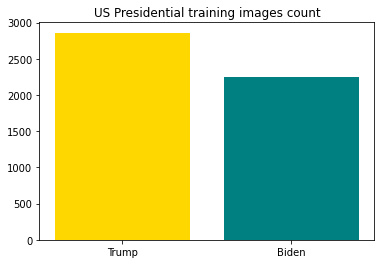

In [23]:
import matplotlib.pyplot as plt

# Set the data
vote_counts = [X_train_a.shape[0], X_train_b.shape[0]]
candidates = ['Trump', 'Biden']

# Create the bar plot
plt.bar(candidates, vote_counts, color=['gold', 'teal'])

# Add the title and axis labels
plt.title('US Presidential training images count')

# Show the plot
plt.show()

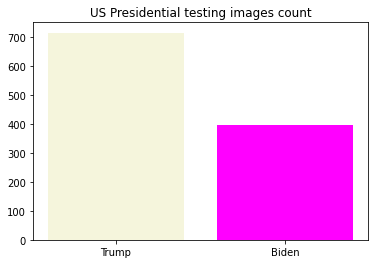

In [25]:
import matplotlib.pyplot as plt

# Set the data
vote_counts = [X_test_a.shape[0], X_test_b.shape[0]]
candidates = ['Trump', 'Biden']

# Create the bar plot
plt.bar(candidates, vote_counts, color=['beige', 'magenta'])

# Add the title and axis labels
plt.title('US Presidential testing images count')

# Show the plot
plt.show()

Defining Encoder

In [4]:
def enc():
    input_img = layers.Input(shape=(120, 120, 3))
    x = layers.Conv2D(256,kernel_size=5, strides=2, padding='same',activation='relu')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(512,kernel_size=5, strides=2, padding='same',activation='relu')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(1024,kernel_size=5, strides=2, padding='same',activation='relu')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(9216)(x)
    encoded = layers.Reshape((3,3,1024))(x)

    encoder = keras.Model(input_img, encoded,name="encoder")
    return encoder

In [57]:
enc().summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 120, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 60, 60, 256)       19456     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 512)       3277312   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 512)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 1024)        1310

In [60]:
# plot_model(enc(), to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


Defining Decoder

In [5]:
def dec():
    decoder_input= layers.Input(shape=((3,3,1024)))
    x = layers.Conv2D(1024,kernel_size=5, strides=2, padding='same',activation='relu')(decoder_input)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(512,kernel_size=5, strides=2, padding='same',activation='relu')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(256,kernel_size=5, strides=2, padding='same',activation='relu')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(np.prod((120, 120, 3)))(x)
    decoded = layers.Reshape((120, 120, 3))(x)

    decoder = keras.Model(decoder_input, decoded,name="decoder")
    return decoder

In [ ]:
# plot_model(dec(), to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [27]:
dec().summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 3, 3, 1024)]      0         
                                                                 
 conv2d_24 (Conv2D)          (None, 2, 2, 1024)        26215424  
                                                                 
 up_sampling2d (UpSampling2D  (None, 4, 4, 1024)       0         
 )                                                               
                                                                 
 conv2d_25 (Conv2D)          (None, 2, 2, 512)         13107712  
                                                                 
 up_sampling2d_1 (UpSampling  (None, 4, 4, 512)        0         
 2D)                                                             
                                                                 
 conv2d_26 (Conv2D)          (None, 2, 2, 256)         3277

Defining Auto Encoder

In [2]:
def autoEnc():
    auto_input = layers.Input(shape=(120,120,3))
    encoded = enc()(auto_input)
    decoded = dec()(encoded)

    autoencoder = keras.Model(auto_input, decoded,name="autoencoder")
    autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=5e-5, beta_1=0.5, beta_2=0.999), loss='mae')
    return autoencoder

Plotting model summary

In [ ]:
# plot_model(autoEnc(), to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [6]:
autoEnc().summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 120, 120, 3)]     0         
                                                                 
 encoder (Functional)        (None, 3, 3, 1024)        54162944  
                                                                 
 decoder (Functional)        (None, 120, 120, 3)       86880192  
                                                                 
Total params: 141,043,136
Trainable params: 141,043,136
Non-trainable params: 0
_________________________________________________________________


Training first model

In [31]:
autoencoder_a = autoEnc()

In [28]:
# history1 = autoencoder_a.fit(X_train_a, X_train_a,epochs=2700,batch_size=512,shuffle=True,validation_data=(X_test_a, X_test_a))

Plotting training loss

In [29]:
# plt.plot(history1.history['loss'], label='Training Loss')
# plt.plot(history1.history['val_loss'], label='Validation Loss')
# plt.legend()

In [17]:
def plot_image(inputname):
    data = cv.imread(inputname)
    data = cv.cvtColor(data, cv.COLOR_BGR2RGB)
    fig = plt.imshow(data)
    fig.set_cmap('hot')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)


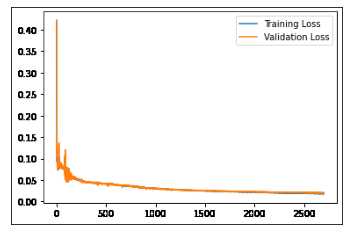

In [18]:
plot_image('C:/Users/touhama/Desktop/project items/enc1.PNG')

Saving model wieghts

In [30]:
# autoencoder_a.save('C:/Users/touhama/Desktop/project items/autoencoder/autoencoder_a.hdf5')

Load and evaluate first model

In [32]:
autoencoder_a = load_model("C:/Users/touhama/Desktop/project items/autoencoder/autoencoder_a.hdf5")
autoencoder_a.evaluate(X_test_a, X_test_a)

23/23 [==============================] - 40s 2s/step - loss: 0.0184


0.018370246514678

Show first model result

1/1 [==============================] - 1s 529ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

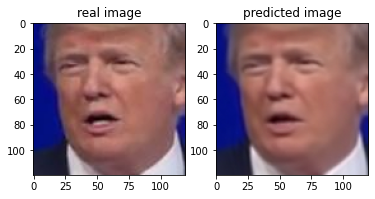

In [33]:
output_image = autoencoder_a.predict(np.array([X_test_a[120]]))

%matplotlib inline
plt.figure()
fig, axs = plt.subplots(1, 2)

axs[0].imshow(X_test_a[120])
axs[0].set_title('real image')

axs[1].imshow(output_image[0])
axs[1].set_title('predicted image')

plt.show()

Training second model

In [34]:
autoencoder_b = autoEnc()

In [34]:
# history2 = autoencoder_b.fit(X_train_b, X_train_b,epochs=2700,batch_size=512,shuffle=True,validation_data=(X_test_b, X_test_b))

Plotting training loss

In [35]:
# plt.plot(history2.history['loss'], label='Training Loss')
# plt.plot(history2.history['val_loss'], label='Validation Loss')
# plt.legend()

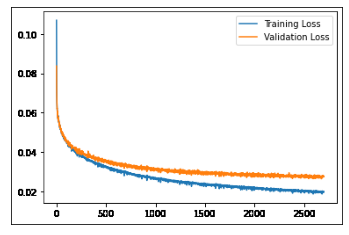

In [19]:
plot_image('C:/Users/touhama/Desktop/project items/enc2.PNG')

Saving model wieghts

In [36]:
# autoencoder_b.save('C:/Users/touhama/Desktop/autoencoder/autoencoder_b.hdf5')

Load and evaluate second model

In [36]:
autoencoder_b = load_model("C:/Users/touhama/Desktop/project items/autoencoder/autoencoder_b.hdf5")
autoencoder_b.evaluate(X_test_b, X_test_b)

13/13 [==============================] - 29s 2s/step - loss: 0.0220


0.022019091993570328

Show second model result

1/1 [==============================] - 0s 483ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

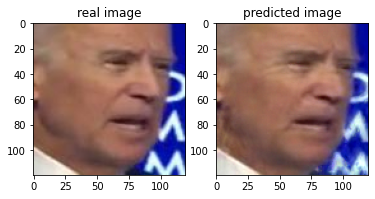

In [37]:
output_image = autoencoder_b.predict(np.array([X_test_b[30]]))

%matplotlib inline
plt.figure()
fig, axs = plt.subplots(1, 2)

axs[0].imshow(X_test_b[30])
axs[0].set_title('real image')

axs[1].imshow(output_image[0])
axs[1].set_title('predicted image')

plt.show()

Load models parts separately

In [38]:
# TO LOAD ONLY THE ENCODER A
encoder_a = keras.Model(autoencoder_a.layers[1].input, autoencoder_a.layers[1].output)
# TO LOAD ONLY THE DECODER A
decoder_a = keras.Model(autoencoder_a.layers[2].input, autoencoder_a.layers[2].output)

# TO LOAD ONLY THE ENCODER B
encoder_b = keras.Model(autoencoder_b.layers[1].input, autoencoder_b.layers[1].output)
# TO LOAD ONLY THE DECODER B
decoder_b = keras.Model(autoencoder_b.layers[2].input, autoencoder_b.layers[2].output)

In [40]:
# !mkdir transformed1
# !mkdir transformed2

Transform image from first character to the second one

In [39]:
from IPython.display import clear_output
def face_transform(source,destination,encoder,decoder):
    counter = 0
    for dirname, _, filenames in os.walk(source):
        for filename in filenames:
                image = cv.imread(os.path.join(source, filename))
                image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
                image = image.astype('float32')
                image /= 255.0
                image = encoder.predict(np.array([image]))
                image = decoder.predict(image)
                image = cv.normalize(image, None, alpha = 0, beta = 255, norm_type = cv.NORM_MINMAX, dtype = cv.CV_32F)
                image = image.astype(np.uint8)
                plt.imsave(os.path.join(destination,filename),image[0])
                counter += 1
                clear_output(wait=True)
                print("Transformation progress: "+str(counter)+"/"+str(len(filenames)))


In [28]:
# face_transform('C:/Users/touhama/Desktop/autoencoder/results_1/','C:/Users/touhama/Desktop/autoencoder/transformed1',encoder_a,decoder_b)

Transformation progress: 1701/1701


In [29]:
# face_transform('C:/Users/touhama/Desktop/autoencoder/results_2/','C:/Users/touhama/Desktop/autoencoder/transformed2',encoder_a,decoder_b)

Transformation progress: 1875/1875


Swapping faces

In [7]:
import cv2
import dlib
import numpy


PREDICTOR_PATH = 'C:/Users/touhama/Desktop/project items/autoencoder/shape_predictor_68_face_landmarks.dat'
SCALE_FACTOR = 1 
FEATHER_AMOUNT = 11

FACE_POINTS = list(range(17, 68))
MOUTH_POINTS = list(range(48, 61))
RIGHT_BROW_POINTS = list(range(17, 22))
LEFT_BROW_POINTS = list(range(22, 27))
RIGHT_EYE_POINTS = list(range(36, 42))
LEFT_EYE_POINTS = list(range(42, 48))
NOSE_POINTS = list(range(27, 35))
JAW_POINTS = list(range(0, 17))


# Points used to line up the images.
ALIGN_POINTS = (LEFT_BROW_POINTS + RIGHT_EYE_POINTS + LEFT_EYE_POINTS +
                               RIGHT_BROW_POINTS + NOSE_POINTS + MOUTH_POINTS)

# Points from the second image to overlay on the first. The convex hull of each
# element will be overlaid.
OVERLAY_POINTS = [
    LEFT_EYE_POINTS + RIGHT_EYE_POINTS + LEFT_BROW_POINTS + RIGHT_BROW_POINTS,
    NOSE_POINTS + MOUTH_POINTS,
]

# Amount of blur to use during colour correction, as a fraction of the
# pupillary distance.
COLOUR_CORRECT_BLUR_FRAC = 0.6

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(PREDICTOR_PATH)


class TooManyFaces(Exception):
    pass

class NoFaces(Exception):
    pass

def get_landmarks(im):
    rects = detector(im, 1)
    
    if len(rects) > 1:
        raise TooManyFaces
    if len(rects) == 0:
        raise NoFaces

    return numpy.matrix([[p.x, p.y] for p in predictor(im, rects[0]).parts()])

def annotate_landmarks(im, landmarks):
    im = im.copy()
    for idx, point in enumerate(landmarks):
        pos = (point[0, 0], point[0, 1])
        cv2.putText(im, str(idx), pos,
                    fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,
                    fontScale=0.4,
                    color=(0, 0, 255))
        cv2.circle(im, pos, 3, color=(0, 255, 255))
    return im

def draw_convex_hull(im, points, color):
    points = cv2.convexHull(points)
    cv2.fillConvexPoly(im, points, color=color)

def get_face_mask(im, landmarks):
    im = numpy.zeros(im.shape[:2], dtype=numpy.float64)

    for group in OVERLAY_POINTS:
        draw_convex_hull(im,
                         landmarks[group],
                         color=1)

    im = numpy.array([im, im, im]).transpose((1, 2, 0))

    im = (cv2.GaussianBlur(im, (FEATHER_AMOUNT, FEATHER_AMOUNT), 0) > 0) * 1.0
    im = cv2.GaussianBlur(im, (FEATHER_AMOUNT, FEATHER_AMOUNT), 0)

    return im
    
def transformation_from_points(points1, points2):


    points1 = points1.astype(numpy.float64)
    points2 = points2.astype(numpy.float64)

    c1 = numpy.mean(points1, axis=0)
    c2 = numpy.mean(points2, axis=0)
    points1 -= c1
    points2 -= c2

    s1 = numpy.std(points1)
    s2 = numpy.std(points2)
    points1 /= s1
    points2 /= s2

    U, S, Vt = numpy.linalg.svd(points1.T * points2)

    # The R we seek is in fact the transpose of the one given by U * Vt. This
    # is because the above formulation assumes the matrix goes on the right
    # (with row vectors) where as our solution requires the matrix to be on the
    # left (with column vectors).
    R = (U * Vt).T

    return numpy.vstack([numpy.hstack(((s2 / s1) * R,
                                       c2.T - (s2 / s1) * R * c1.T)),
                         numpy.matrix([0., 0., 1.])])

def read_im_and_landmarks(fname):
    im = cv2.imread(fname, cv2.IMREAD_COLOR)
    im = cv2.resize(im, (im.shape[1] * SCALE_FACTOR,
                         im.shape[0] * SCALE_FACTOR))
    s = get_landmarks(im)

    return im, s

def warp_im(im, M, dshape):
    output_im = numpy.zeros(dshape, dtype=im.dtype)
    cv2.warpAffine(im,
                   M[:2],
                   (dshape[1], dshape[0]),
                   dst=output_im,
                   borderMode=cv2.BORDER_TRANSPARENT,
                   flags=cv2.WARP_INVERSE_MAP)
    return output_im

def correct_colours(im1, im2, landmarks1):
    blur_amount = COLOUR_CORRECT_BLUR_FRAC * numpy.linalg.norm(
                              numpy.mean(landmarks1[LEFT_EYE_POINTS], axis=0) -
                              numpy.mean(landmarks1[RIGHT_EYE_POINTS], axis=0))
    blur_amount = int(blur_amount)
    if blur_amount % 2 == 0:
        blur_amount += 1
    im1_blur = cv2.GaussianBlur(im1, (blur_amount, blur_amount), 0)
    im2_blur = cv2.GaussianBlur(im2, (blur_amount, blur_amount), 0)

    # Avoid divide-by-zero errors.
    im2_blur += (128 * (im2_blur <= 1.0)).astype(im2_blur.dtype)

    return (im2.astype(numpy.float64) * im1_blur.astype(numpy.float64) /
                                                im2_blur.astype(numpy.float64))



In [8]:
def swap_faces(path1, path2):
    im1, landmarks1 = read_im_and_landmarks(path1)
    im1 = cv.cvtColor(im1, cv.COLOR_BGR2RGB)

    im2, landmarks2 = read_im_and_landmarks(path2)
    im2 = cv.cvtColor(im2, cv.COLOR_BGR2RGB)
    
    M = transformation_from_points(landmarks1[ALIGN_POINTS], landmarks2[ALIGN_POINTS])
    mask = get_face_mask(im2, landmarks2)
    warped_mask = warp_im(mask, M, im1.shape)
    combined_mask = numpy.max([get_face_mask(im1, landmarks1), warped_mask],axis=0)
    warped_im2 = warp_im(im2, M, im1.shape)
    warped_corrected_im2 = correct_colours(im1, warped_im2, landmarks1)
    output_im = im1 * (1.0 - combined_mask) + warped_corrected_im2 * combined_mask
    output_im = cv.cvtColor(np.uint8(output_im), cv.COLOR_BGR2RGB)
    return output_im


Plotting some explaining images

In [9]:
p1 = 'C:/Users/touhama/Desktop/project items/autoencoder/frames_1/frame19.jpg'
p2 = "C:/Users/touhama/Desktop/project items/autoencoder/transformed1/frame19.jpg.jpg"

im1, landmarks1 = read_im_and_landmarks(p1)
# im1 = cv.cvtColor(im1, cv.COLOR_BGR2RGB)

im2, landmarks2 = read_im_and_landmarks(p2)
# im2 = cv.cvtColor(im2, cv.COLOR_BGR2RGB)

M = transformation_from_points(landmarks1[ALIGN_POINTS], landmarks2[ALIGN_POINTS])
mask = get_face_mask(im2, landmarks2)
warped_mask = warp_im(mask, M, im1.shape)
combined_mask = numpy.max([get_face_mask(im1, landmarks1), warped_mask],axis=0)
warped_im2 = warp_im(im2, M, im1.shape)
warped_corrected_im2 = correct_colours(im1, warped_im2, landmarks1)
output_im = im1 * (1.0 - combined_mask) + warped_corrected_im2 * combined_mask
output_im = cv.cvtColor(np.uint8(output_im), cv.COLOR_BGR2RGB)

In [43]:
def plot_landmarks(im, landmarks):
    plt.imshow(im[:, :, ::-1])
    for idx, point in enumerate(landmarks):
        pos = (point[0, 0], point[0, 1])
        plt.scatter(pos[0], pos[1], color='blue')
        plt.text(pos[0], pos[1], str(idx), color='red')
    plt.axis('off')
    plt.show()

def plot_face_mask(im, face_mask):
    plt.imshow(im[:, :, ::-1])
    plt.imshow(face_mask, cmap='gray', alpha=0.5)
    plt.axis('off')
    plt.show()

def plot_image_pair(im1, im2):
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(im1[:, :, ::-1])
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(im2[:, :, ::-1])
    plt.axis('off')
    plt.show()


Face landmarks

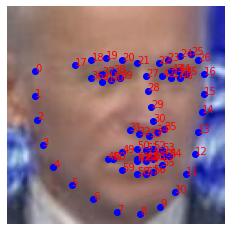

In [44]:
plot_landmarks(im2, landmarks2)

Face mask 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


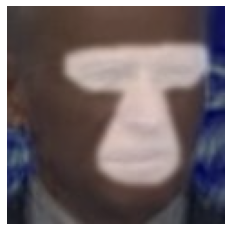

In [45]:
plot_face_mask(im2, mask)

Swapped face

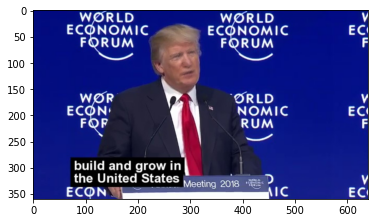

In [10]:
plt.imshow(output_im)

Why we use autoencoders?

Swap faces without transform with autoencoders

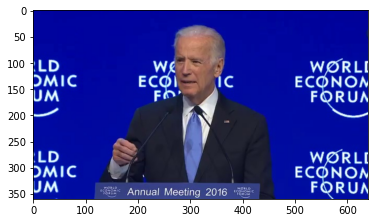

In [48]:
img3 = cv.imread('C:/Users/touhama/Desktop/project items/autoencoder/frames_3/frame1.jpg')
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)
plt.imshow(img3)

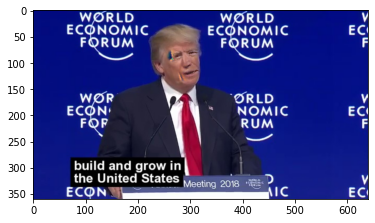

In [50]:
p1 = 'C:/Users/touhama/Desktop/project items/autoencoder/frames_1/frame19.jpg'
p2 = 'C:/Users/touhama/Desktop/project items/autoencoder/frames_3/frame1.jpg'
img = swap_faces(p1,p2)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

Prepare frames to make the video

In [5]:
frames = []

for i in range(total_frames_1):
    p1 = 'C:/Users/touhama/Desktop/project items/autoencoder/frames_1/frame'+ str(i)+'.jpg'
    p2 = "C:/Users/touhama/Desktop/project items/autoencoder/transformed1/frame"+ str(i)+'.jpg.jpg'
    frames.append(swap_faces(p1, p2))
    print(i)
frames = np.array(frames)
_, height, width, layers = frames.shape

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Make and save video

In [6]:
videomaker = cv.VideoWriter('C:/Users/touhama/Desktop/project items/autoencoder/testnew.avi', cv.VideoWriter_fourcc(*'DIVX'), 31, (width,height))

for frame in frames:
    videomaker.write(frame)

videomaker.release()

Join sound to video

In [51]:
from moviepy.editor import VideoFileClip, AudioFileClip, concatenate_videoclips
from scipy.io import wavfile
import noisereduce as nr

Cleaning noise

In [53]:
# load sound
rate, data = wavfile.read("C:/Users/touhama/Desktop/project items/all_new.wav")
# perform noise reduction
reduced_noise = nr.reduce_noise(y=data, sr=rate)
wavfile.write("C:/Users/touhama/Desktop/project items/mywav_reduced_noise.wav", rate, reduced_noise)

In [55]:
# Open the video and audio
video_clip = VideoFileClip('C:/Users/touhama/Desktop/project items/autoencoder/trump1.avi')
# audio_clip = AudioFileClip("C:/Users/touhama/Desktop/all_new.wav")
audio_clip = AudioFileClip("C:/Users/touhama/Desktop/project items/mywav_reduced_noise.wav")
final_clip = video_clip.set_audio(audio_clip)
final_clip.write_videofile("C:/Users/touhama/Desktop/project items/final_vid.mp4")		


t:   0%|          | 2/1701 [00:57<05:54,  4.79it/s, now=None]

Moviepy - Building video C:/Users/touhama/Desktop/project items/final_vid.mp4.
MoviePy - Writing audio in final_vidTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/1701 [00:59<05:54,  4.79it/s, now=None]

MoviePy - Done.
Moviepy - Writing video C:/Users/touhama/Desktop/project items/final_vid.mp4



t:   0%|          | 2/1701 [01:16<05:54,  4.79it/s, now=None]

Moviepy - Done !
Moviepy - video ready C:/Users/touhama/Desktop/project items/final_vid.mp4
